In [16]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [2]:
GOOGLE_DATA = "../data/google/train.tsv"
MSRP_DATA = "../data/msrp/msr_paraphrase_train.txt"
PARABANK_DATA = "../data/parabank/parabank_5m.tsv"
QUORA_DATA = "../data/quora/quora_duplicate_questions.tsv"

# Google Data

In [3]:
google_df = pd.read_csv(GOOGLE_DATA, sep="\t")

In [15]:
google_df.head()

,id,sentence1,sentence2,label
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
5,6,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ...",1
7,8,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...,1


In [5]:
google_df.shape

(49401, 4)

In [7]:
google_df.isnull().sum()

id           0
sentence1    0
sentence2    0
label        0
dtype: int64

In [8]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49401 entries, 0 to 49400
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49401 non-null  int64 
 1   sentence1  49401 non-null  object
 2   sentence2  49401 non-null  object
 3   label      49401 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [9]:
google_df.iloc[0]['sentence1']

'In Paris , in October 1560 , he secretly met the English ambassador , Nicolas Throckmorton , asking him for a passport to return to England through Scotland .'

In [10]:
google_df.iloc[0]['sentence2']

'In October 1560 , he secretly met with the English ambassador , Nicolas Throckmorton , in Paris , and asked him for a passport to return to Scotland through England .'

In [11]:
google_df.iloc[1]['sentence1']

'The NBA season of 1975 -- 76 was the 30th season of the National Basketball Association .'

In [12]:
google_df.iloc[1]['sentence2']

'The 1975 -- 76 season of the National Basketball Association was the 30th season of the NBA .'

In [13]:
google_df['label'].value_counts()

0    27572
1    21829
Name: label, dtype: int64

In [17]:
google_df[google_df['label'] == 1].shape

(21829, 4)

In [14]:
google_df = google_df[google_df['label'] == 1]

In [19]:
google_df.head(10)

,id,sentence1,sentence2,label
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1
5,6,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ...",1
7,8,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...,1
11,12,"He was a scholar in Metaphysical Literature , ...","He was a scholar in metaphysical literature , ...",1
12,13,The city sits at the confluence of the Snake R...,The city lies at the confluence of the Snake R...,1
15,16,Werder 's forces invested Belfort and reached ...,Werder 's troops invested Belfort and reached ...,1
17,18,The first five weapons were delivered in the f...,The first five weapons were delivered in the f...,1
19,20,The friendship between him and Duncan ended at...,The friendship between him and Duncan ended in...,1


In [20]:
google_df.drop(['id', 'label'], axis=1, inplace=True)

In [21]:
google_df.columns = ['input', 'target']

In [22]:
google_df.head()

,input,target
1,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...
3,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...
4,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...
5,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ..."
7,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...


# MSRP Dataset

In [23]:
msrp_df = pd.read_csv(MSRP_DATA, sep="\t", error_bad_lines=False)

Skipping line 102: expected 5 fields, saw 6
Skipping line 656: expected 5 fields, saw 6
Skipping line 867: expected 5 fields, saw 6
Skipping line 880: expected 5 fields, saw 6
Skipping line 980: expected 5 fields, saw 6
Skipping line 1439: expected 5 fields, saw 6
Skipping line 1473: expected 5 fields, saw 6
Skipping line 1822: expected 5 fields, saw 6
Skipping line 1952: expected 5 fields, saw 6
Skipping line 2009: expected 5 fields, saw 6
Skipping line 2230: expected 5 fields, saw 6
Skipping line 2506: expected 5 fields, saw 6
Skipping line 2523: expected 5 fields, saw 6
Skipping line 2809: expected 5 fields, saw 6
Skipping line 2887: expected 5 fields, saw 6
Skipping line 2920: expected 5 fields, saw 6
Skipping line 2944: expected 5 fields, saw 6
Skipping line 3241: expected 5 fields, saw 6
Skipping line 3358: expected 5 fields, saw 6
Skipping line 3459: expected 5 fields, saw 6
Skipping line 3491: expected 5 fields, saw 6
Skipping line 3643: expected 5 fields, saw 6
Skipping line 3

In [24]:
msrp_df.head()

,Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [25]:
msrp_df.drop(['#1 ID', '#2 ID'], axis=1, inplace=True)

In [26]:
msrp_df.head()

,Quality,#1 String,#2 String
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [27]:
msrp_df['Quality'].value_counts()

1    2661
0    1277
Name: Quality, dtype: int64

In [28]:
msrp_df = msrp_df[msrp_df.Quality==1]

In [29]:
msrp_df.head()

,Quality,#1 String,#2 String
0,1,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
2,1,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
4,1,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
5,1,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart's compan...
7,1,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....


In [32]:
msrp_df.drop(['Quality'], axis=1, inplace=True)

In [33]:
msrp_df.columns = ["input", "target"]

In [34]:
msrp_df.head()

,input,target
0,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
2,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
4,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...
5,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart's compan...
7,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....


# Quora dataset

In [35]:
quora_df = pd.read_csv(QUORA_DATA, sep="\t")


In [36]:
quora_df.shape

(404290, 6)

In [37]:
quora_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [38]:
quora_df[quora_df.id == 3272].values

array([[3272, 6486, 6487, 'How do you define "human being?"',
        'How would you define the "human being"?', 1]], dtype=object)

In [39]:
quora_df = quora_df[quora_df.is_duplicate==1]

In [40]:
quora_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [41]:
quora_df.drop(['id', 'qid1', 'qid2', 'is_duplicate'], axis=1, inplace=True)

In [42]:
quora_df.head()

,question1,question2
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,How can I be a good geologist?,What should I do to be a great geologist?
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,What can make Physics easy to learn?,How can you make physics easy to learn?
13,What was your first sexual experience like?,What was your first sexual experience?


In [43]:
quora_df.columns = ["input", "target"]

In [44]:
final_df = pd.concat([google_df, msrp_df, quora_df])

In [45]:
final_df.head()

,input,target
1,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...
3,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...
4,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...
5,William Henry Henry Harman was born on 17 Febr...,"William Henry Harman was born in Waynesboro , ..."
7,With a discrete amount of probabilities Formul...,Given a discrete set of probabilities formula ...


In [46]:
final_df.shape

(173753, 2)

In [47]:
final_df.sample(frac=1).head()

,input,target
273345,"In DNA extraction, what is the role of NaCl?",What role does NaCl play in DNA extraction?
6553,"In the House of Representatives , all of Calif...",In the House of Representatives all 9th distri...
44981,"In October 1923 , Spencer began renting Henry ...","In October 1923 , Spencer began renting Henry ..."
304940,What are certain things that makes Indians happy?,What are the things that make Indians happy an...
1355,The comment period was to have expired on Monday.,A public comment period on the proposed new ta...


In [3]:
def _load_data(path, input_column, target_column, label_column):
    df = pd.read_csv(path, sep="\t", on_bad_lines="skip").astype(str)
    df = df.loc[df[label_column] == "1"]
    df = df.rename(columns={input_column: "input_text", target_column: "target_text"})
    df = df[["input_text", "target_text"]]

    return df

In [4]:
def get_google_dataset() -> pd.DataFrame:
    google_df = _load_data(GOOGLE_DATA, "sentence1", "sentence2", "label")
    return google_df


def get_quora_dataset() -> pd.DataFrame:
    quora_df = _load_data(QUORA_DATA, "question1", "question2", "is_duplicate")
    return quora_df


def get_msrp_dataset() -> pd.DataFrame:
    msrp_df = _load_data(MSRP_DATA, "#1 String", "#2 String", "Quality")
    return msrp_df


def get_parabank_dataset() -> pd.DataFrame:
    parabank_df = _load_data(PARABANK_DATA, "sentence1", "sentence2", "label")
    return parabank_df

In [8]:
def get_combined_dataset(
    google_paws: bool = False,
    msrp: bool = False,
    quora: bool = False,
    parabank: bool = False,
    randomize: bool = True,
) -> pd.DataFrame:
    df = pd.DataFrame()
    if google_paws:
        google_df = get_google_dataset()
        df = pd.concat([df, google_df])
    if msrp:
        msrp_df = get_msrp_dataset()
        df = pd.concat([df, msrp_df])
    if quora:   
        quora_df = get_quora_dataset()
        df = pd.concat([df, quora_df])
    if parabank:
        parabank_df = get_parabank_dataset()
        df = pd.concat([df, parabank_df])
        
    
    # df.apply(_clean_unnecessary_spaces)
    if randomize:
        df = df.sample(frac=1).reset_index(drop=True)
    return df


In [9]:
df = get_combined_dataset(google_paws=True, msrp=True, quora=True)

In [10]:
df.head()

,input_text,target_text
0,What's the funniest highbrow joke you've ever ...,What is the best joke you've ever heard? Pleas...
1,How do I overcome emotional attachment?,What do you do to overcome emotional attachments?
2,What are the biggest success stories from Shar...,What are the most successful businesses that a...
3,How can I reduce my belly fat in 2 months?,How can I reduce my Belly and tummy fat?
4,How did one small decision change your life?,What small decision have you made that turned ...


In [46]:
#word cloud
text = " ".join(df["input_text"].values)

wordcloud = WordCloud(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False,
    background_color="white",
).generate(text)
    

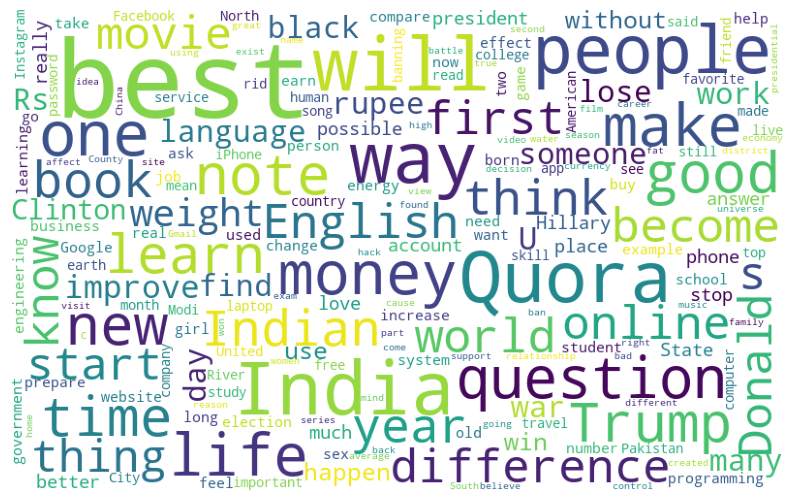

In [47]:
## plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<AxesSubplot: >

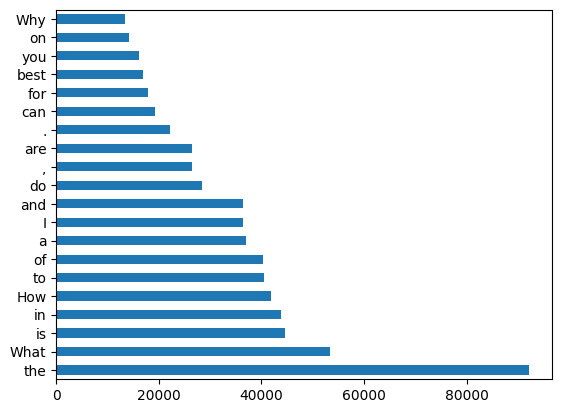

In [50]:
## common words

pd.Series((text).split()).value_counts().head(20).sort_values(ascending=False).plot.barh()


<AxesSubplot: >

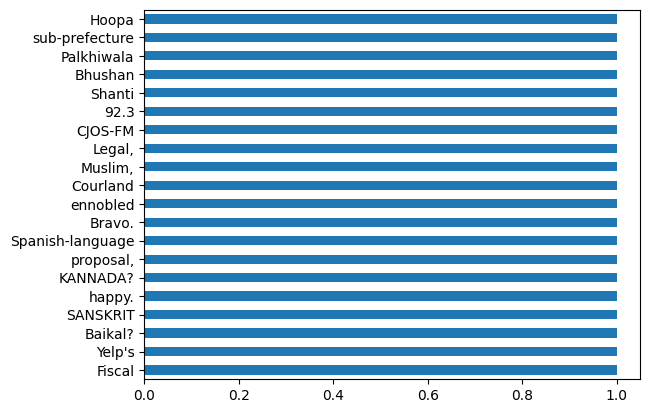

In [62]:
## rare words
pd.Series((text).split()).value_counts()[-20:].plot.barh()


In [35]:
def _clean_unnecessary_spaces(out_string):
    out_string = str(out_string)
    out_string = " ".join(out_string.split())
    out_string = (
        out_string.replace(" .", ".")
        .replace(" ?", "?")
        .replace(" !", "!")
        .replace(" ,", ",")
        .replace(" ' ", "'")
        .replace(" n't", "n't")
        .replace(" 'm", "'m")
        .replace(" 's", "'s")
        .replace(" 've", "'ve")
        .replace(" 're", "'re")
    )
    return out_string

In [36]:
df.apply(_clean_unnecessary_spaces)

input_text     0 What's the funniest highbrow joke you've eve...
target_text    0 What is the best joke you've ever heard? Ple...
dtype: object

In [37]:
text = " ".join(df["input_text"].values)

In [39]:
# most common words between input and target
def _get_common_words(input_text, target_text):
    input_words = set(input_text.split())
    target_words = set(target_text.split())
    return list(input_words.intersection(target_words))
ip_txt = " ".join(df["input_text"].values)
op_txt = " ".join(df["input_text"].values)
input_words = set(ip_txt.split())
target_words = set(op_txt.split())
list(input_words.intersection(target_words))


['quest',
 'Converse',
 'Bourn',
 'When,',
 'Shiri',
 'Gen)',
 'Party?',
 'bracelet?',
 'Basirhat',
 "Army's",
 'downloading?',
 'vibrate',
 'integrands',
 'Findlay',
 'Pothan',
 'discrimination?',
 'Roswell',
 'Languages:',
 'notes',
 'Kjellemyr',
 'Jamali',
 'consuming',
 'automotives',
 'thinning',
 'conserving',
 'self-harm?',
 'known/interesting',
 'contribute?',
 'Shuster',
 'Mains',
 'reflash',
 'Anthony',
 'detainer',
 'pilgrimage?',
 'Africa,',
 'whiskey',
 '"Book',
 'choked',
 'Ankita',
 'sheldon',
 'fence,',
 'cotton?',
 'already-swollen',
 'populist',
 'SX?',
 'Chapa',
 'Niepsuj',
 'neurotic',
 'behave',
 'pardon',
 'neighbourhood',
 "Bhagat's",
 'Kholm',
 'proceeded,',
 'Aryans',
 'Survey',
 'College,',
 'notice?',
 'Geographic',
 'Tisch',
 'Muscat',
 'lowland',
 'third-tier',
 'Paradox?',
 'Mill?',
 'party',
 'along?',
 'B-site',
 '$42.72',
 'Matter',
 'weirdest/creepiest',
 'terro?',
 'Marxism',
 'conciliation,',
 'ATMs',
 'websites,',
 'Emirates',
 'dust-covered',
 'und